In [2]:
!pip install xgboost

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [5]:
df = pd.read_csv("loan_risk.csv")

In [6]:
df.head()

,ClientID,income,age,loan,Default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ClientID  2050 non-null   int64  
 1   income    2050 non-null   float64
 2   age       2050 non-null   float64
 3   loan      2050 non-null   float64
 4   Default   2050 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 80.2 KB


In [8]:
df.isnull().sum()

ClientID    0
income      0
age         0
loan        0
Default     0
dtype: int64

In [9]:
df.drop('ClientID', axis=1, inplace=True)

In [10]:
df.head()

,income,age,loan,Default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
X = df.drop('Default', axis=1)
y = df['Default']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [25]:
model = xgb.XGBClassifier()

In [26]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
predicted_y = model.predict(X_test)

In [28]:
X_test

,income,age,loan
1404,60842.94116,60.255143,6608.968795
835,54820.97401,20.560396,10070.949050
1507,21144.56287,21.355886,703.363923
1495,66768.36121,49.130875,4255.367636
578,48271.49838,21.662341,6077.680287
...,...,...,...
1907,27363.63180,44.386421,3215.263093
483,68052.80692,28.758802,1415.718263
527,61006.10730,54.181296,5850.770691
1390,63437.70015,54.628140,11963.364220


In [29]:
predicted_y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [30]:
model.score(X_test, y_test)

0.9805068226120858

In [31]:
model.score(X_test, y_test)*100

98.05068226120858

In [32]:
print(classification_report(y_test, predicted_y))
print(confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       442
           1       0.93      0.93      0.93        71

    accuracy                           0.98       513
   macro avg       0.96      0.96      0.96       513
weighted avg       0.98      0.98      0.98       513

[[437   5]
 [  5  66]]


# Categorías

In [33]:
df = pd.read_csv("loan_risk_C.csv")

In [34]:
df.head()

,ClientID,income,age,gender,loan,Default
0,1,66155.92510,59.017015,Female,8106.532131,0
1,2,34415.15397,48.117153,Female,6564.745018,0
2,3,57317.17006,63.108049,Female,8020.953296,0
3,4,42709.53420,45.751972,Female,6103.642260,0
4,5,66952.68885,18.584336,Female,8770.099235,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ClientID  2050 non-null   int64  
 1   income    2050 non-null   float64
 2   age       2050 non-null   float64
 3   gender    2050 non-null   object 
 4   loan      2050 non-null   float64
 5   Default   2050 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 96.2+ KB


In [36]:
df.drop('ClientID', axis=1, inplace=True)

In [37]:
df.head()

,income,age,gender,loan,Default
0,66155.92510,59.017015,Female,8106.532131,0
1,34415.15397,48.117153,Female,6564.745018,0
2,57317.17006,63.108049,Female,8020.953296,0
3,42709.53420,45.751972,Female,6103.642260,0
4,66952.68885,18.584336,Female,8770.099235,1


In [39]:
df = pd.get_dummies(df, df.columns[df.dtypes=='object'])

In [38]:
df.dtypes=='object'

income     False
age        False
gender      True
loan       False
Default    False
dtype: bool

In [40]:
df.head()

,income,age,loan,Default,gender_Female,gender_Male
0,66155.92510,59.017015,8106.532131,0,1,0
1,34415.15397,48.117153,6564.745018,0,1,0
2,57317.17006,63.108049,8020.953296,0,1,0
3,42709.53420,45.751972,6103.642260,0,1,0
4,66952.68885,18.584336,8770.099235,1,1,0


In [41]:
X = df.drop('Default', axis=1)
y = df['Default']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [45]:
model = xgb.XGBClassifier()

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [47]:
predicted_y = model.predict(X_test)

In [48]:
model.score(X_test, y_test)*100

98.05068226120858

In [49]:
cf_matrix = confusion_matrix(y_test, predicted_y)

In [62]:
cf_matrix

array([[438,   4],
       [  6,  65]], dtype=int64)

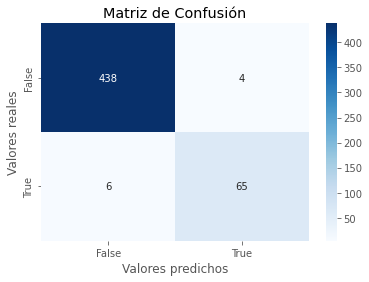

In [67]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')
ax.set_title("Matriz de Confusión")
ax.set_xlabel("Valores predichos")
ax.set_ylabel("Valores reales")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()